In [105]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv('data/test.csv',parse_dates=['Flight_Date','Request_Date'])

In [107]:
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00+00:00,2019-07-29,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00+00:00,2019-07-29,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00+00:00,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00+00:00,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00+00:00,2019-07-30,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
5,2019-07-28 23:00:00+00:00,2019-07-30,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
6,2019-07-28 11:00:00+00:00,2019-07-30,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
7,2019-07-28 23:00:00+00:00,2019-07-30,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
8,2019-07-29 11:00:00+00:00,2019-07-30,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
9,2019-07-28 11:00:00+00:00,2019-07-30,22,2019-07-30 FR 8545,SXF-STN,FR 8545,50.99,€


In [108]:
data['Departure_hour'] = pd.to_numeric(data['Departure_hour'])
data['Request_Date'] = data['Request_Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
data['Flight_Date'] = data['Flight_Date'] + pd.to_timedelta(data['Departure_hour'], 'h')

In [109]:
data['Request_Date'] = pd.to_datetime(data['Request_Date'])
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00,2019-07-29 18:00:00,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00,2019-07-29 22:00:00,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00,2019-07-30 06:00:00,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00,2019-07-30 06:00:00,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00,2019-07-30 10:00:00,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
5,2019-07-28 23:00:00,2019-07-30 10:00:00,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
6,2019-07-28 11:00:00,2019-07-30 18:00:00,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
7,2019-07-28 23:00:00,2019-07-30 18:00:00,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
8,2019-07-29 11:00:00,2019-07-30 18:00:00,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
9,2019-07-28 11:00:00,2019-07-30 22:00:00,22,2019-07-30 FR 8545,SXF-STN,FR 8545,50.99,€


In [110]:
Duration_Time = data['Flight_Date'] - data['Request_Date']
Duration_Time = Duration_Time.apply(lambda x: x.total_seconds())     
Duration_Time = divmod(Duration_Time, 3600)[0]
data.insert(2, "Duration_Time", Duration_Time, True)

In [111]:
data

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00,2019-07-29 18:00:00,31.0,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00,2019-07-29 22:00:00,35.0,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00,2019-07-30 06:00:00,43.0,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00,2019-07-30 06:00:00,31.0,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00,2019-07-30 10:00:00,47.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
5,2019-07-28 23:00:00,2019-07-30 10:00:00,35.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
6,2019-07-28 11:00:00,2019-07-30 18:00:00,55.0,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
7,2019-07-28 23:00:00,2019-07-30 18:00:00,43.0,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
8,2019-07-29 11:00:00,2019-07-30 18:00:00,31.0,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
9,2019-07-28 11:00:00,2019-07-30 22:00:00,59.0,22,2019-07-30 FR 8545,SXF-STN,FR 8545,50.99,€


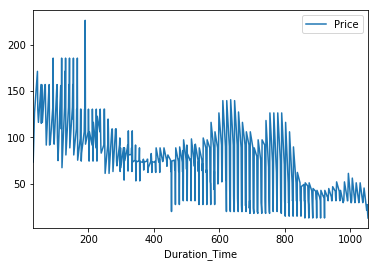

In [124]:
fig, ax = plt.subplots()
df = data.groupby(['Duration_Time'])[['Price']].median().plot(ax=ax)
ax.legend()
plt.show()

,Price
Duration_Time,
31.0,73.430
35.0,126.470
43.0,166.760
44.0,171.350
45.0,130.550
47.0,116.270
55.0,157.070
56.0,115.170
57.0,157.070


In [120]:
df['Duration_Time']

KeyError: 'Duration_Time'